IBM Machine Learning Professional Certificate<br>
__Supervised Machine Learning: Classification__

# Classifications for Data Science Salaries 
***

__Author__: Chawit Kaewnuratchadasorn<br>
__Date__: 13th Jan 2022<br>

This notebook was created for Supervised Machine Learning, Classification for Machine Learning course of IBM Machine Learning certificate. The dataset was obtained from Kaggle Dataset by Jack Ogozaly. The link was attached below. In this notebook, the prediction of salary level will be performedby classifications. This project aims to practice classifications, regularisations, and ensemble models. 

Data source: [Salaries Dataset](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)

The contents include:
> 1. Overview of Dataset
> 2. Plan for Classifications
> 3. Data Cleaning and Features Transformation
> 4. Classifications
>>  Logistic Regression<br>
>>  Support Vector Machine<br>
>>  Random Forests<br>
> 5. Summary and Future Plan

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from colorsetup import colors, palette

sns.set()
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

## 1. Overview of Dataset

The dataset has 62642 rows with 29 columns The column names are shown below. Unfortunately, we have some null values that we need to clean and some features are also needed to be transformed.

In [2]:
data = pd.read_csv('Salary_Data.csv')
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

print([i for i in data.columns])

Number of rows in the data: 62642
Number of columns in the data: 29
['timestamp', 'company', 'level', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary', 'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid', 'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']


In [3]:
# Examine the columns, rows, and missing data
# Shows 5 first data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


## 2. Plan for Classifications

After I reviewed the column names, I decided to use only title, year of experience, year at company, and degrees. I also want to divide the base salary into 3 class: low, mid, and high. We first select the columns we need. Here, I think it is important to note that this is a quite bad idea to select by my ow, but if I have to use all to find the most related components, it will be too difficult for now. For example, location should also affect the salary, but I do not use it here. 

In [4]:
needed_col = ["title", "totalyearlycompensation", "yearsofexperience", "yearsatcompany", \
              "Bachelors_Degree", "Masters_Degree", "Doctorate_Degree","basesalary"]

In [5]:
salary = data[needed_col]
salary.head()

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,Bachelors_Degree,Masters_Degree,Doctorate_Degree,basesalary
0,Product Manager,127000,1.5,1.5,0,0,0,107000.0
1,Software Engineer,100000,5.0,3.0,0,0,0,0.0
2,Product Manager,310000,8.0,0.0,0,0,0,155000.0
3,Software Engineering Manager,372000,7.0,5.0,0,0,0,157000.0
4,Software Engineer,157000,5.0,3.0,0,0,0,0.0


Then, my plan for data cleaning is only to use one-hot for title and group base salary.

## 3. Data Cleaning and Features Transformation

> One-hot Method on Title<br>
> Grouping Base Salary

### 3.1 One-hot Method on Title

In [6]:
mask = salary.dtypes == np.object
categorical_cols = salary.columns[mask]
categorical_cols

num_ohc_cols = (salary[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

/var/folders/yh/vqxc6hl143s191zkg6k4w_vm0000gn/T/ipykernel_31170/2301178078.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = salary.dtypes == np.object


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
salary_ohc = salary.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(salary_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    salary_ohc = salary_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=salary_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    salary_ohc = pd.concat([salary_ohc, new_df], axis=1)

/var/folders/yh/vqxc6hl143s191zkg6k4w_vm0000gn/T/ipykernel_31170/169641162.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(salary_ohc[col]).astype(np.int)


In [8]:
salary_ohc.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Bachelors_Degree,Masters_Degree,Doctorate_Degree,basesalary,title_0,title_1,title_2,...,title_5,title_6,title_7,title_8,title_9,title_10,title_11,title_12,title_13,title_14
0,127000,1.5,1.5,0,0,0,107000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100000,5.0,3.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,310000,8.0,0.0,0,0,0,155000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,372000,7.0,5.0,0,0,0,157000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,157000,5.0,3.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 3.2 Grouping Base Salary

First of all, we drop the 0 salary because it does not make a lot of sense having them in our dataset. Then, we can group them into low, mid, high.

In [9]:
salary_ohc = salary_ohc.loc[(salary_ohc["basesalary"]!=0)]
salary_ohc = salary_ohc.reset_index(drop=True)
salary_ohc.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Bachelors_Degree,Masters_Degree,Doctorate_Degree,basesalary,title_0,title_1,title_2,...,title_5,title_6,title_7,title_8,title_9,title_10,title_11,title_12,title_13,title_14
0,127000,1.5,1.5,0,0,0,107000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310000,8.0,0.0,0,0,0,155000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,372000,7.0,5.0,0,0,0,157000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,300000,15.0,11.0,0,0,0,180000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,156000,4.0,4.0,0,0,0,135000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='basesalary', ylabel='Count'>

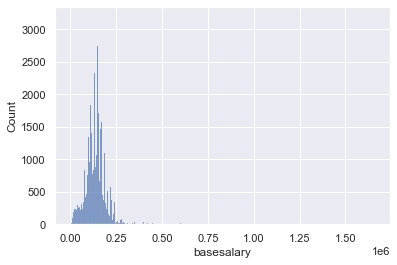

In [10]:
sns.histplot(data=salary_ohc, x="basesalary")

From the histogram, it means that we have outliers.

<AxesSubplot:xlabel='basesalary', ylabel='Count'>

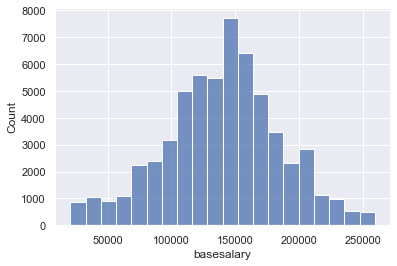

In [11]:
des_salary_ohc = salary_ohc["basesalary"].describe()

intr_qr = des_salary_ohc["75%"] - des_salary_ohc["25%"]

outlier_1 = des_salary_ohc["25%"] - 1.5 * intr_qr
outlier_2 = des_salary_ohc["75%"] + 1.5 * intr_qr

salary_ohc = salary_ohc[(salary_ohc["basesalary"] > outlier_1) & (salary_ohc["basesalary"] < outlier_2)]
salary_ohc = salary_ohc.reset_index(drop=True)

sns.histplot(data=salary_ohc, x="basesalary",  bins=20)

The data look great! Then, we group by using the criterior from Pew study. I obtained from this [link](https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system). Then, we proceed.

In [12]:
salary_ohc["Salary"] = pd.cut(salary_ohc.basesalary, [salary_ohc["basesalary"].min(), 52200, 156600, salary_ohc["basesalary"].max()], labels=[0, 1, 2])
salary_ohc = salary_ohc.drop("basesalary", axis = 1)
salary_ohc.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Bachelors_Degree,Masters_Degree,Doctorate_Degree,title_0,title_1,title_2,title_3,...,title_6,title_7,title_8,title_9,title_10,title_11,title_12,title_13,title_14,Salary
0,127000,1.5,1.5,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,310000,8.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,372000,7.0,5.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,300000,15.0,11.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,156000,4.0,4.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


Then, I try to perform pairplot. It actually looks great for classification. And lastly, I drop all Nan.

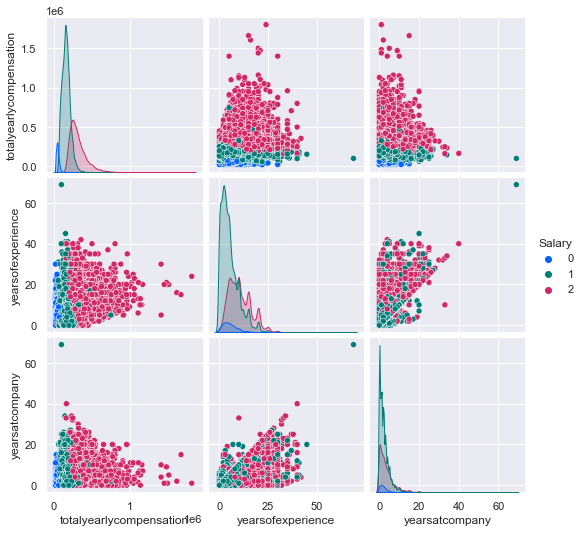

In [27]:
sns.pairplot(salary_ohc[["totalyearlycompensation", "yearsofexperience", \
                         "yearsatcompany", "Salary"]], hue = "Salary")
plt.axis("off")
plt.savefig("Classification.png")

In [14]:
salary_ohc = salary_ohc.dropna()
salary_ohc = salary_ohc.reset_index(drop=True)

## 4. Classifications

In this section, we first split training and testing data by using `StratifiedShuffleSplit`. Then, we will perform 4 types of classifications, including:

> Logistic Regression<br>
> Support Vector Machine<br>
> Random Forests<br>

### Stratified Shuffle Split

In [15]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

feature_cols = salary_ohc.columns[:-1]

train_idx, test_idx = next(strat_shuf_split.split(salary_ohc[feature_cols], salary_ohc.Salary))

# Create the dataframes
X_train = salary_ohc.loc[train_idx, feature_cols]
y_train = salary_ohc.loc[train_idx, 'Salary']

X_test  = salary_ohc.loc[test_idx, feature_cols]
y_test  = salary_ohc.loc[test_idx, 'Salary']

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='micro'),
                         'recall': recall_score(y_test, y_pred, average='micro'),
                         'f1': f1_score(y_test, y_pred, average='micro')},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       753
           1       0.77      0.44      0.56     10605
           2       0.47      0.87      0.61      6203

    accuracy                           0.57     17561
   macro avg       0.41      0.44      0.39     17561
weighted avg       0.63      0.57      0.55     17561

   accuracy  precision    recall        f1
0  0.570241   0.570241  0.570241  0.570241


/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 84.5, 'Ground Truth')

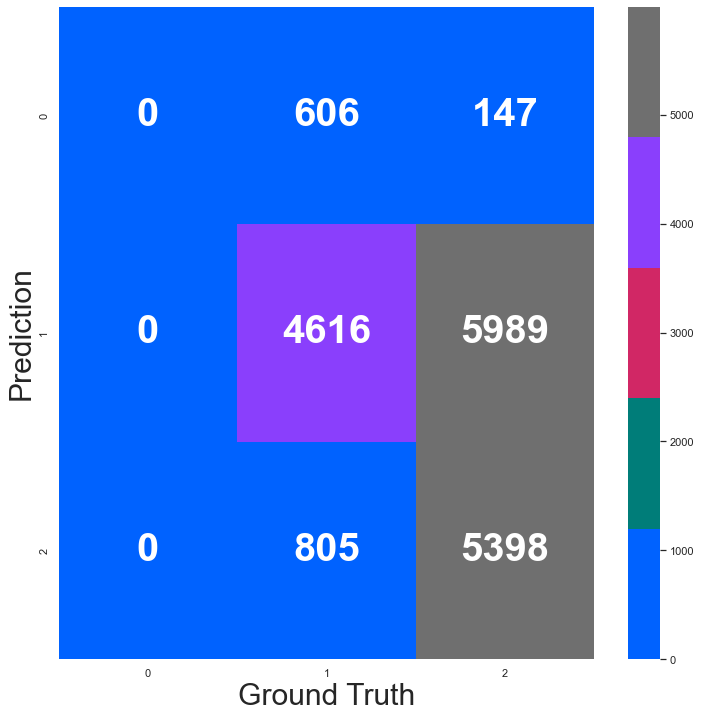

In [18]:
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

### Support Vector Machine

In [19]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)

/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='micro'),
                         'recall': recall_score(y_test, y_pred, average='micro'),
                         'f1': f1_score(y_test, y_pred, average='micro')},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       753
           1       0.00      0.00      0.00     10605
           2       0.35      1.00      0.52      6203

    accuracy                           0.35     17561
   macro avg       0.12      0.33      0.17     17561
weighted avg       0.12      0.35      0.18     17561

   accuracy  precision    recall        f1
0  0.353226   0.353226  0.353226  0.353226


/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/boomchawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 84.5, 'Ground Truth')

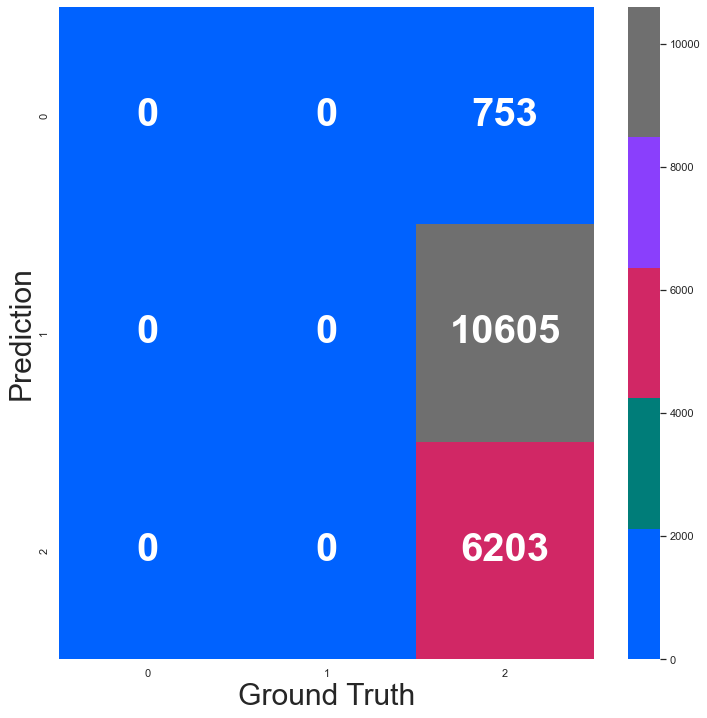

In [21]:
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [23]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='micro'),
                         'recall': recall_score(y_test, y_pred, average='micro'),
                         'f1': f1_score(y_test, y_pred, average='micro')},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       753
           1       0.87      0.88      0.88     10605
           2       0.81      0.81      0.81      6203

    accuracy                           0.85     17561
   macro avg       0.84      0.83      0.84     17561
weighted avg       0.85      0.85      0.85     17561

   accuracy  precision    recall        f1
0  0.849211   0.849211  0.849211  0.849211


Text(0.5, 84.5, 'Ground Truth')

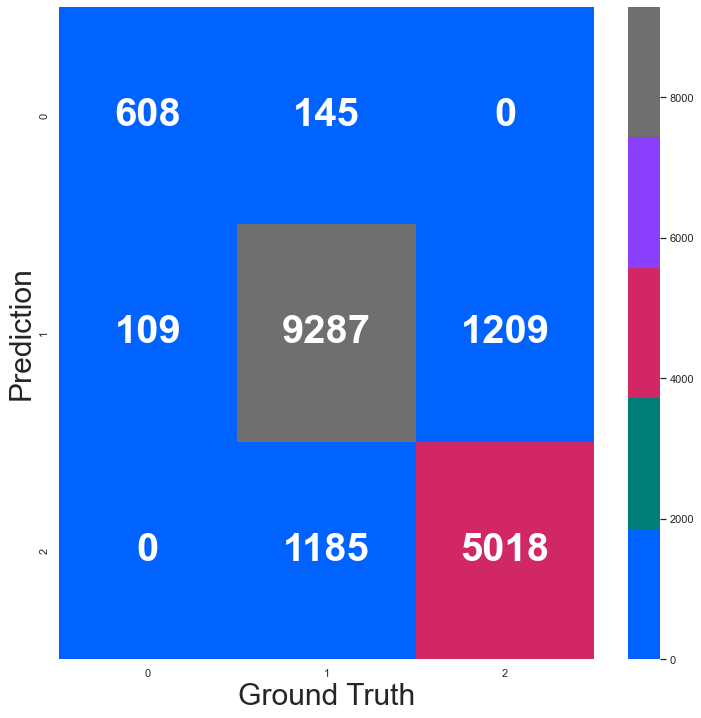

In [24]:
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

## 5. Summary

Here is the summary and possible further improvement of this notebook. 

<li> Random Forest is the best classification for salary class</li>
<li> The stacking might be worse than random forest because logistic regression and support vector machine perform quite poorly for classification </li>
<li> Data can be prepared better for the models </li>
<li> Boosting and Bagging can be applied for Random Forest</li>
<li> Cross validation by GridSearch can be applied</li>
